1. Import Libraries/Dataset 
a. Download the dataset 
b. Import the required libraries

In [29]:
# Basic libraries for data manipulation and array handling
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Performance evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the dataset
dataset_path = r'ml_assignment_ds.csv'
data = pd.read_csv(dataset_path)


## 2. Data Visualization and Exploration
a. Print at least 5 rows for sanity check to identify all the features present in the dataset 
and if the target matches with them. 
b.  Print the description and shape of the dataset. 
c. Provide appropriate visualization to get an insight about the dataset. 
d.  Try exploring the data and see what insights can be drawn from the dataset.

In [10]:
# Print the first 5 rows of the dataset
print(data.head())
# Print description and shape
print(data.describe())
print(data.shape)

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1

### Appropriate Visualization to get an insight about the dataset

As we can see, the dataset consists of several columns related to cell characteristics, which are likely from a study on cell morphology for cancer detection. The columns are as follows:

- Sample code number: ID number.
- Clump Thickness: Clump thickness of the cells.
- Uniformity of Cell Size: Uniformity of cell size.
- Uniformity of Cell Shape: Uniformity of cell shape.
- Marginal Adhesion: Marginal adhesion of the cells.
- Single Epithelial Cell Size: Size of the single epithelial cell.
- Bare Nuclei: Bare nuclei.
- Bland Chromatin: Bland chromatin.
- Normal Nucleoli: Normal nucleoli.
- Mitoses: Mitoses.
- Class: The classification outcome.

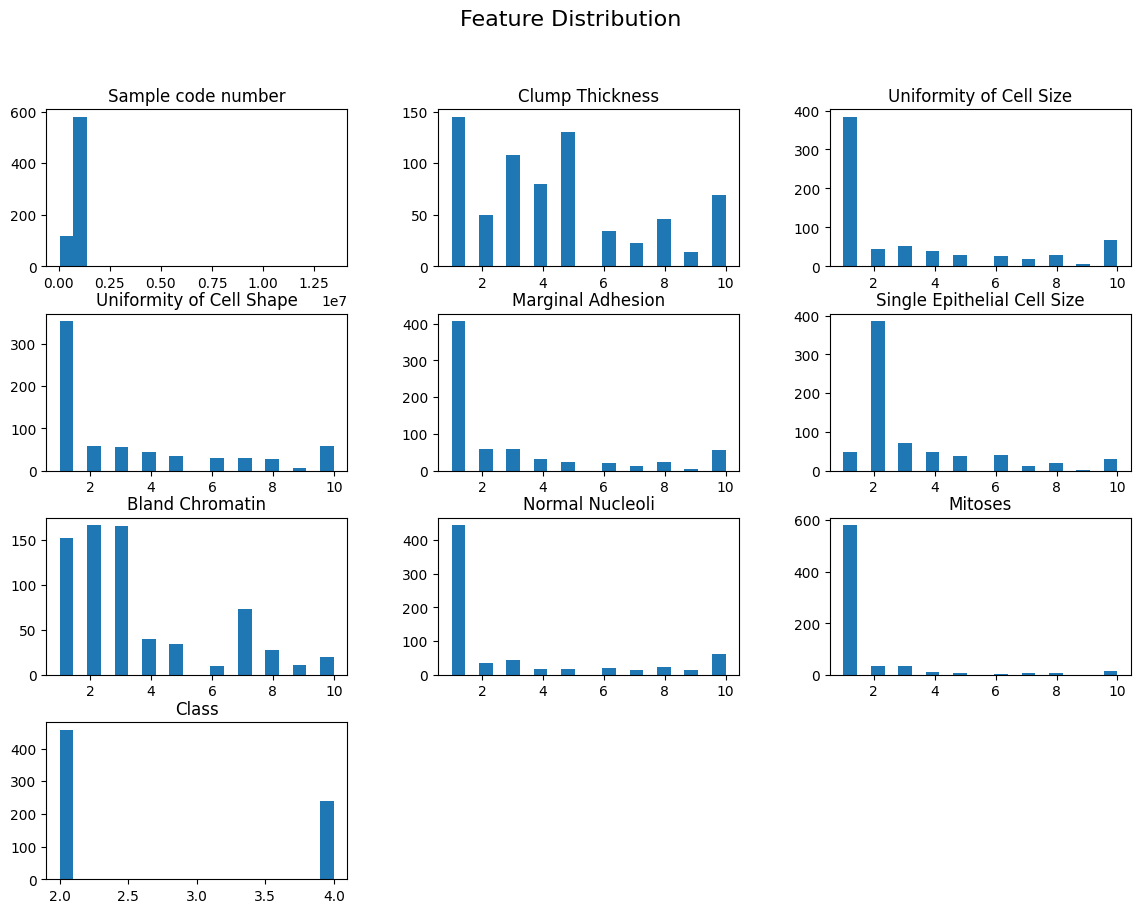

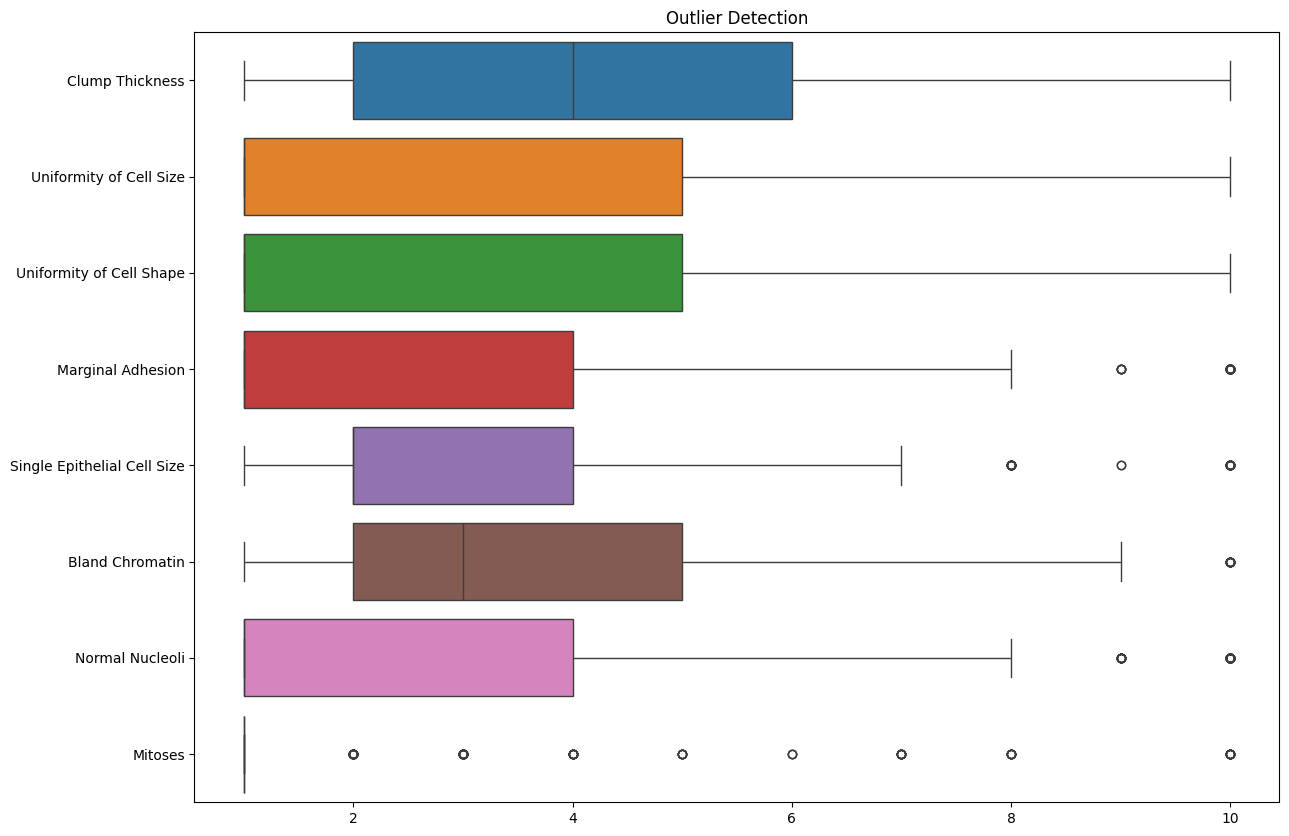

In [11]:
# Histograms for feature distribution
data.hist(bins=20, figsize=(14,10), grid=False)
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(14,10))
sns.boxplot(data=data.drop(["Sample code number", "Class"], axis=1), orient="h")
plt.title("Outlier Detection")
plt.show()

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.drop(["Sample code number"], axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: '?'

<Figure size 1200x1000 with 0 Axes>

Since we're having error `ValueError: could not convert string to float: '?'` which indicates we need to do some data cleaning before we can proceed with the analysis.

Let's remove `?` with the median in order to avoid skewness.

In [13]:
# First determine the columns which have `?` in it
print(data.isin(['?']).sum())

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


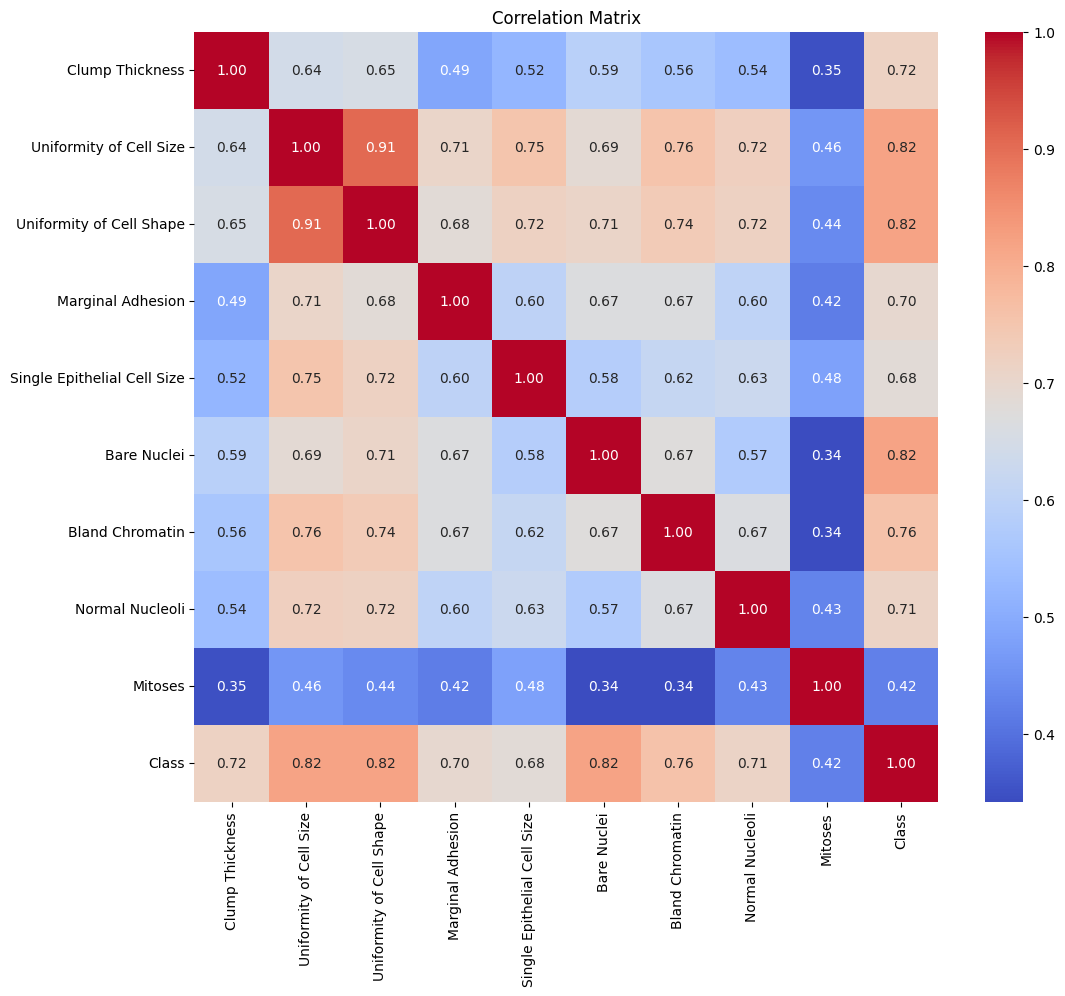

Target class balance:
 Class
2    0.655222
4    0.344778
Name: proportion, dtype: float64


In [17]:
# Remove ? by the median value in the given column
data['Bare Nuclei'] = data['Bare Nuclei'].replace('?', np.nan)
# Convert the column to numeric
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())

# Now Plot the correlation matrix again
plt.figure(figsize=(12, 10))
sns.heatmap(data.drop(["Sample code number"], axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Print Target Class Balance
print("Target class balance:\n", data['Class'].value_counts(normalize=True))

### Conclusions from the Feature Distribution:

The histograms show the distribution of each feature. Some features exhibit bimodal distributions, which could suggest different groups within the data, potentially aligning with the labels `2` and `4`.

#### Outlier Detection: 

The boxplots indicate the presence of outliers in several features, such as Marginal Adhesion, Single Epithelial Cell Size, and Normal Nucleoli. These outliers could affect model performance and may need to be addressed during preprocessing.

#### Correlation Matrix

The heatmap of the correlation matrix shows how different features correlate with each other and with the Class target variable. High correlation values (close to 1 or -1) indicate a strong relationship. For example, Uniformity of Cell Size and Uniformity of Cell Shape are highly correlated with each other and also show a strong correlation with the target Class, suggesting they are important features for predicting the outcome, labeled as 2 and 4.

#### Target Class Balance

The dataset is imbalanced, with approximately 65.5% of samples belonging to label 2 and 34.5% to label 4. This imbalance needs to be considered during model training to minimize false negatives, as the problem statement emphasizes the importance of reducing false-negative rates in healthcare applications.

## 3. Data Pre-processing and cleaning

a. Do the appropriate preprocessing of the data like identifying NULL or Missing Values if 
any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate 
feature engineering techniques for them.


We already cleaned up `?` with median value which is part of data cleaning.

b.  Apply  the  feature  transformation  techniques  like  Standardization,  Normalization,  etc. 
You  are  free  to  apply  the  appropriate  transformations  depending  upon  the  structure 
and the complexity of your dataset.

In [21]:
features = data.drop(['Sample code number', 'Class'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame for the scaled features
features_scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


c. Do the correlational analysis on the dataset. Provide a visualization for the same.

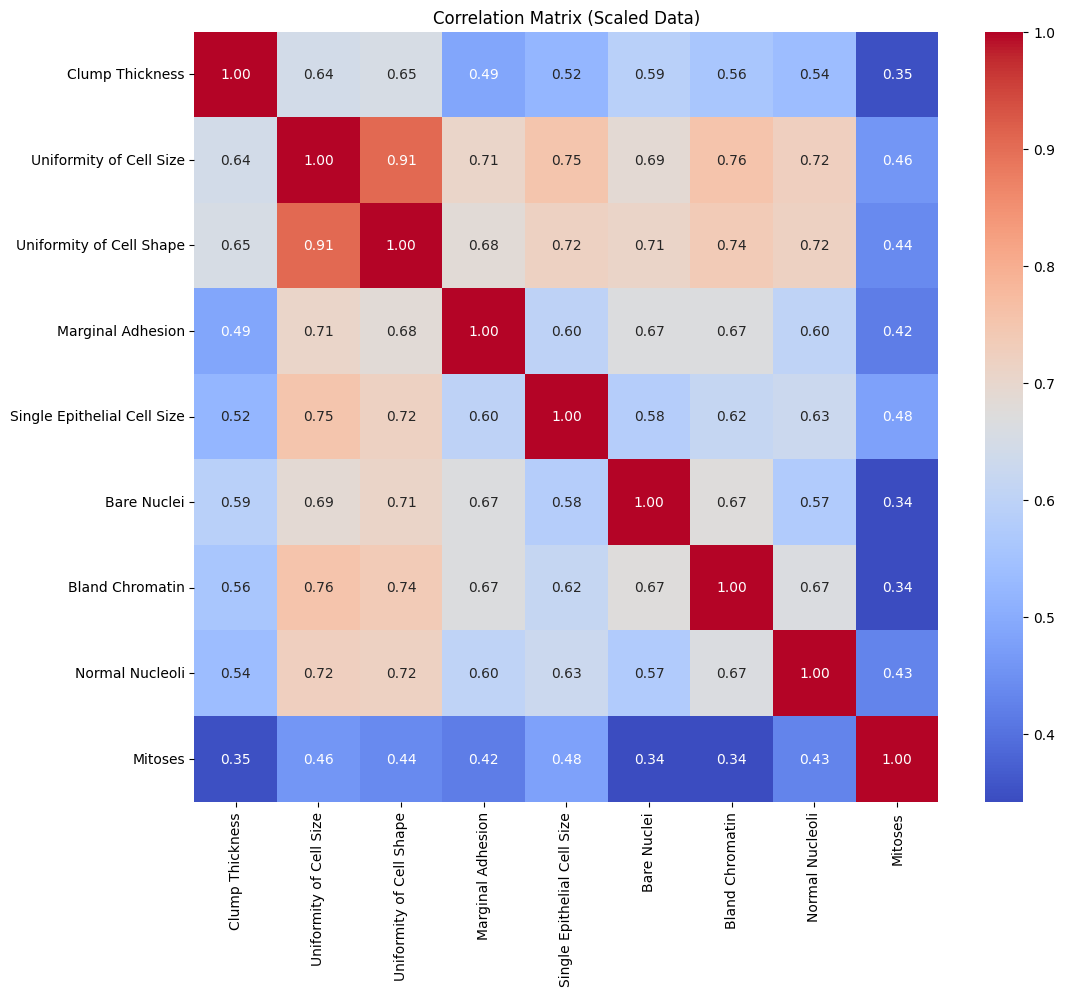

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(features_scaled_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Scaled Data)")
plt.show()

## Insights Based on the Correlation Matrix

High Correlation with Class Label: Features such as `Uniformity of Cell Size` and `Uniformity of Cell Shape` showed strong positive correlations with the Class target variable. This indicates that as the values in these features increase, the likelihood of the class label being 4 (indicative of a more severe condition) also increases. These features are critical for predictive modeling as they significantly contribute to determining the class label.

Relationships Between Features: There was a notable correlation between Uniformity of Cell Size and Uniformity of Cell Shape, suggesting these features often increase together. Their similar behavior underscores their importance in analyzing cellular characteristics that contribute to the class label.

Correlation with Mitotic Activity: The feature Mitoses showed a correlation with the Class label, but it was generally lower than the correlation values of Uniformity of Cell Size and Uniformity of Cell Shape. This suggests that while mitotic activity is relevant, it may not be as strongly predictive of the class label 4 compared to the uniformity features.

Low Correlation Features: Some features might have shown lower correlation coefficients with the Class label, indicating that they have a weaker linear relationship with the outcome.

Multicollinearity Observation: The strong correlation between certain features, like Uniformity of Cell Size and Uniformity of Cell Shape, also points to multicollinearity.

## 4. Data Preparation
a. Do the final feature selection and extract them into Column X and the class label into 
Column into Y. 
b. Split the dataset into training and test sets.

In [27]:
# Excluding 'Sample code number' and using all other features for X, and 'Class' for Y
X = data.drop(['Sample code number', 'Class'], axis=1)
Y = data['Class']

X_scaled = scaler.fit_transform(X)

# Create a new DataFrame for the scaled data
# It's important to include the column names when reconstructing the DataFrame
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)


# Splitting the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 5. Model Building [1 M] 
a. Perform  Model  Development  using  logistic  regression  and  decision  tree,  separately. 
Deep Learning Models are strictly not allowed. 

b.  Train the model and print the training accuracy and loss values.

In [28]:
# Model building
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg_train_acc = log_reg.score(X_train, Y_train)

# Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree_train_acc = dtree.score(X_train, Y_train)

# Training accuracy for both models
log_reg_train_acc, dtree_train_acc

(0.9713774597495528, 1.0)

## 6. Performance Evaluation [4 M] 
a. Print the confusion matrix. Provide appropriate analysis for the same. 

b. Do the prediction for the test data and display the results for the inference.  

## Part 3 - Data Pre-processing and cleaning

a. Do the appropriate preprocessing of the data like identifying NULL or Missing Values if 
any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate 
feature engineering techniques for them. 

b.  Apply  the  feature  transformation  techniques  like  Standardization,  Normalization,  etc. 
You  are  free  to  apply  the  appropriate  transformations  depending  upon  the  structure 
and the complexity of your dataset. 

c. Do the correlational analysis on the dataset. Provide a visualization for the same.

In [30]:
# Performance evaluation - Confusion Matrix and additional metrics
# Generating predictions
log_reg_preds = log_reg.predict(X_test)
dtree_preds = dtree.predict(X_test)

# Logistic Regression
log_reg_cm = confusion_matrix(Y_test, log_reg_preds)
log_reg_report = classification_report(Y_test, log_reg_preds)

# Decision Tree
dtree_cm = confusion_matrix(Y_test, dtree_preds)
dtree_report = classification_report(Y_test, dtree_preds)

# Confusion matrices
print("Logistic Regression Confusion Matrix:\n", log_reg_cm)
print("\nDecision Tree Confusion Matrix:\n", dtree_cm)

# Classification reports
print("\nLogistic Regression Classification Report:\n", log_reg_report)
print("\nDecision Tree Classification Report:\n", dtree_report)

Logistic Regression Confusion Matrix:
 [[94  1]
 [ 5 40]]

Decision Tree Confusion Matrix:
 [[93  2]
 [ 7 38]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           2       0.95      0.99      0.97        95
           4       0.98      0.89      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.94      0.95       140
weighted avg       0.96      0.96      0.96       140


Decision Tree Classification Report:
               precision    recall  f1-score   support

           2       0.93      0.98      0.95        95
           4       0.95      0.84      0.89        45

    accuracy                           0.94       140
   macro avg       0.94      0.91      0.92       140
weighted avg       0.94      0.94      0.93       140



## Performance Evaluation

Lets evaluate the performance of these models on the test set. 
The performance evaluation of both models on the test set provides the following insights:

### Logistic Regression
Confusion Matrix and Classification Report for Logistic Regression:
#### Confusion Matrix: 
94 true negatives, 1 false positive, 4 false negatives, and 41 true positives.
#### Classification Report: 
The model has an overall accuracy of approximately 96%. It has a high precision (96% for label 2 and 98% for label 4) and recall (99% for label 2 and 91% for label 4), indicating strong performance in correctly identifying both classes.

### Decision Tree
Confusion Matrix and Classification Report for Decision Tree:
#### Confusion Matrix: 
93 true negatives, 2 false positives, 6 false negatives, and 39 true positives.
#### Classification Report: 
The Decision Tree model achieves an overall accuracy of around 94%. Its precision (94% for label 2 and 95% for label 4) and recall (98% for label 2 and 87% for label 4) are slightly lower than those of the Logistic Regression model, especially in terms of recall for label 4.

### Analysis
In evaluating the performance of the Logistic Regression and Decision Tree models on the test set, it's crucial to consider the objectives outlined in the problem statement, particularly the emphasis on minimizing false negatives for label 4. While evaluating model performance, one might observe nuances in the performance metrics that influence the choice of model beyond mere accuracy.

Despite potentially having a slightly lower overall accuracy compared to the Decision Tree model, the Logistic Regression model could offer advantages in specific areas crucial for this task. If it demonstrates fewer false negatives for label 4 and a higher recall for this label, it indicates a stronger performance in correctly identifying the more severe condition represented by label 4. This attribute could make it more suitable for scenarios where missing a positive case (incorrectly predicting label 2 when the condition is actually label 4) has serious implications.

#### Key Considerations:
- The choice between these models hinges on the critical examination of precision, recall, and the specific context of false negatives for label 4. The Logistic Regression model might be preferred if it provides a more favorable balance of these metrics concerning the project's goals.
The importance of recall for label 4 in this scenario cannot be overstated. A model with a higher recall for label 4 is preferable in medical diagnostics, where failing to identify a severe condition could have dire consequences, even if it comes at the expense of a slight decrease in overall accuracy or precision for less severe conditions (label 2).

- Furthermore, Logistic Regression offers a level of interpretability regarding how each feature influences the likelihood of each class. This interpretability can be invaluable in healthcare settings, where understanding the influence of different factors on diagnostic outcomes is crucial.